In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import butter, sosfilt, stft, welch
from scipy.optimize import curve_fit
import scipy.io as sio

In [26]:
def lowpass_filtered(tod, fs, f_lp=50000):
    sos_lp = butter(8, f_lp, 'lp', fs=fs, output='sos')
    filtered = sosfilt(sos_lp, tod)
    
    return filtered

## Overnight charge monitoring at 1e-6 mbar

In [3]:
fname = r"C:\Users\yuhan\Documents\Data\monitoring\20240402_charge_lp.mat"
data = sio.loadmat(fname)

In [4]:
data.keys()

dict_keys(['Tstart', 'Tinterval', 'ExtraSamples', 'RequestedLength', 'Length', 'D', 'E', 'Version'])

In [38]:
fs = int(1/data['Tinterval'][0, 0])
amp_lp = lowpass_filtered(data['D'].T[0], fs, 0.1)
phase_lp = lowpass_filtered(data['E'].T[0], fs, 0.1)

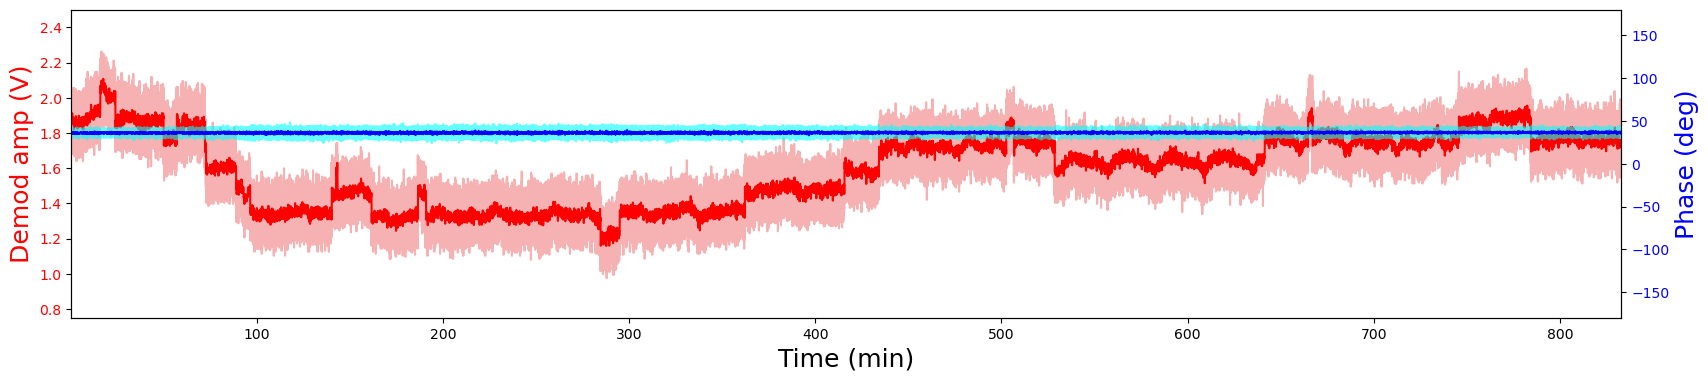

In [48]:
tt_min = np.linspace(0, np.ceil(data['Tinterval'][0, 0] * data['Length'][0, 0]), data['Length'][0, 0]) / 60

fig, ax = plt.subplots(1, 1, figsize = (20, 4))
ax_twin = ax.twinx()

ax.plot(tt_min, data['D'].T[0], 'lightcoral', markersize=12, alpha=0.6)
ax.plot(tt_min, amp_lp, 'r', markersize=12)

ax_twin.plot(tt_min, data['E'].T[0]/50e-3, 'cyan', alpha=0.6)
ax_twin.plot(tt_min, phase_lp/50e-3, 'b')

ax.set_xlim(0.5, 833)
ax_twin.set_xlim(0.5, 833)
ax.set_ylim(0.75, 2.5)
ax_twin.set_ylim(-180, 180)

[t.set_color('r') for t in ax.yaxis.get_ticklines()]
[t.set_color('r') for t in ax.yaxis.get_ticklabels()]
[t.set_color('b') for t in ax_twin.yaxis.get_ticklines()]
[t.set_color('b') for t in ax_twin.yaxis.get_ticklabels()]

ax_twin.set_ylabel('Phase (deg)', color='b', fontsize=18)
ax.set_ylabel('Demod amp (V)', color='r', fontsize=18)
ax.set_xlabel('Time (min)', fontsize=18)
plt.show()

In [49]:
833*60

49980